In [2]:
import pandas as pd

In [3]:
from bokeh.io import show
from bokeh.sampledata.les_mis import data

In [5]:
#file-matrix that contains kl coefficient per each genre pair
df = pd.read_csv("kl_div_no_idle.csv",header='infer')

In [6]:
df = df.rename(columns={'Unnamed: 0':'Genre'})

In [7]:
df = df.set_index('Genre').stack().reset_index()

In [8]:
df.head()

,Genre,level_1,0
0,Action,Action,0.000000
1,Action,Action sports,1.149823
2,Action,Adults only,0.781951
3,Action,Adventure,0.127276
4,Action,Agriculture,1.621293


In [9]:
df.describe()

,0
count,2.073600e+04
mean,inf
std,NaN
min,0.000000e+00
25%,7.680417e-01
50%,2.447244e+00
75%,inf
max,inf


In [10]:
df.columns=['SourceID','DestinationID','Coeff']

In [11]:
df.columns

Index(['SourceID', 'DestinationID', 'Coeff'], dtype='object')

In [12]:
df.head()

,SourceID,DestinationID,Coeff
0,Action,Action,0.000000
1,Action,Action sports,1.149823
2,Action,Adults only,0.781951
3,Action,Adventure,0.127276
4,Action,Agriculture,1.621293


In [13]:
df = df[df.SourceID!=df.DestinationID]

In [14]:
df.describe()

,Coeff
count,2.059200e+04
mean,inf
std,NaN
min,2.132919e-02
25%,7.860181e-01
50%,2.486397e+00
75%,inf
max,inf


In [505]:
df_sim = df[(df['SourceID'].isin(["Horror","Action","Adventure","Children","Anthology","Biography","Comedy","Arts/crafts","Computers","Adults only","Animals","Music", "News","Sitcom","Shopping","Skateboarding","Animated","Drama","Education","Sports event"])) & (df['DestinationID'].isin(["Horror","Action","Adventure","Children","Anthology","Biography","Comedy","Arts/crafts","Computers","Adults only","Animals","Music", "News","Sitcom","Shopping","Skateboarding","Animated","Drama","Education","Sports event"]))]

In [506]:
df_inf = df_sim[df_sim['Coeff'].isin(['inf'])]
df_without_inf = pd.concat([df_sim, df_inf]).drop_duplicates(keep=False)


In [507]:
df_without_inf.describe()

,Coeff
count,243.000000
mean,0.739991
std,0.870530
min,0.029862
25%,0.142291
50%,0.445591
75%,0.879155
max,3.683492


In [508]:
df_sim[df_sim['SourceID']!=df_sim['DestinationID']].sort_values(by='Coeff')

,SourceID,DestinationID,Coeff
16792,Shopping,Music,0.029862
71,Action,Horror,0.030952
10224,Horror,Action,0.031033
12788,Music,Shopping,0.032328
3198,Biography,Comedy,0.035499
4342,Comedy,Biography,0.038360
3239,Biography,Horror,0.038992
10246,Horror,Biography,0.042110
3215,Biography,Drama,0.052502
6790,Drama,Biography,0.054781


In [509]:
df_sim = df_sim.sort_values(by=['SourceID','Coeff'])

In [510]:
df_sim

,SourceID,DestinationID,Coeff
71,Action,Horror,0.030952
22,Action,Biography,0.058676
47,Action,Drama,0.069230
30,Action,Comedy,0.074089
3,Action,Adventure,0.127276
117,Action,Sitcom,0.140832
127,Action,Sports event,0.151585
88,Action,Music,0.210409
116,Action,Shopping,0.242864
5,Action,Animals,0.314255


In [511]:
df_sim.describe()

,Coeff
count,342.000000
mean,inf
std,NaN
min,0.029862
25%,0.191329
50%,0.782311
75%,inf
max,inf


In [512]:
from numpy import inf
df_sim['Coeff'].replace(inf,10,inplace=True)

In [513]:
df_sim[df_sim['Coeff'].isin(['inf'])]

,SourceID,DestinationID,Coeff


In [514]:
import numpy as np
#df_sim['Coeff']= ((10.1 - df_sim['Coeff'])*10)
df_sim['Coeff']= 1/df_sim['Coeff']
#df_sim['Coeff']= np.log(df_sim['Coeff']*100)/np.log(df_sim['Coeff'].max()*100)

In [532]:
df_sim[df_sim['SourceID'] == 'Action'].sort_values(by='Coeff',ascending=False).head(20)

,SourceID,DestinationID,Coeff,source,target
71,Action,Horror,32.308192,0,12
22,Action,Biography,17.042621,0,7
47,Action,Drama,14.444709,0,11
30,Action,Comedy,13.497199,0,9
3,Action,Adventure,7.856962,0,2
117,Action,Sitcom,7.100679,0,16
127,Action,Sports event,6.596965,0,18
88,Action,Music,4.752647,0,13
116,Action,Shopping,4.117537,0,15
5,Action,Animals,3.182125,0,3


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
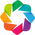

In [516]:
#building chord using holoviews and bokeh libraries
import holoviews as hv
import bokeh as bk
from holoviews import opts, dim

hv.extension('bokeh')

In [517]:
df_sim.columns

Index(['SourceID', 'DestinationID', 'Coeff'], dtype='object')

In [518]:
df_sim['source'] = df_sim.SourceID.astype('category').cat.codes
df_sim['target'] = df_sim.DestinationID.astype('category').cat.codes

In [519]:
nodes_df = pd.DataFrame(df_sim['SourceID'].unique(), columns=['SourceID'])

In [520]:
nodes_sim = hv.Dataset(nodes_df, 'index') #, 'SourceID')
nodes_sim.data.head()
#nodes_sim = hv.Dataset(df_sim)

,index,SourceID
0,0,Action
1,1,Adults only
2,2,Adventure
3,3,Animals
4,4,Animated


In [521]:
smallest_coeff = list(df_sim.groupby('Coeff').count().index.values)

In [523]:
chord =  hv.Chord((df_sim[['source', 'target', 'Coeff']], nodes_sim))#.select(Coeff = smallest_coeff,selection_mode='nodes')

In [524]:
chord.opts(opts.Chord(cmap='Category20', edge_color=dim('Coeff').str(), node_color=dim('index').str(),
               height=1000, labels='SourceID', width=1000))

:Chord   [source,target]   (Coeff)